In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
import pandas as pd

df = pd.read_csv("kc_house_data.csv")

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Изучим данные

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Пропуски отсутствуют

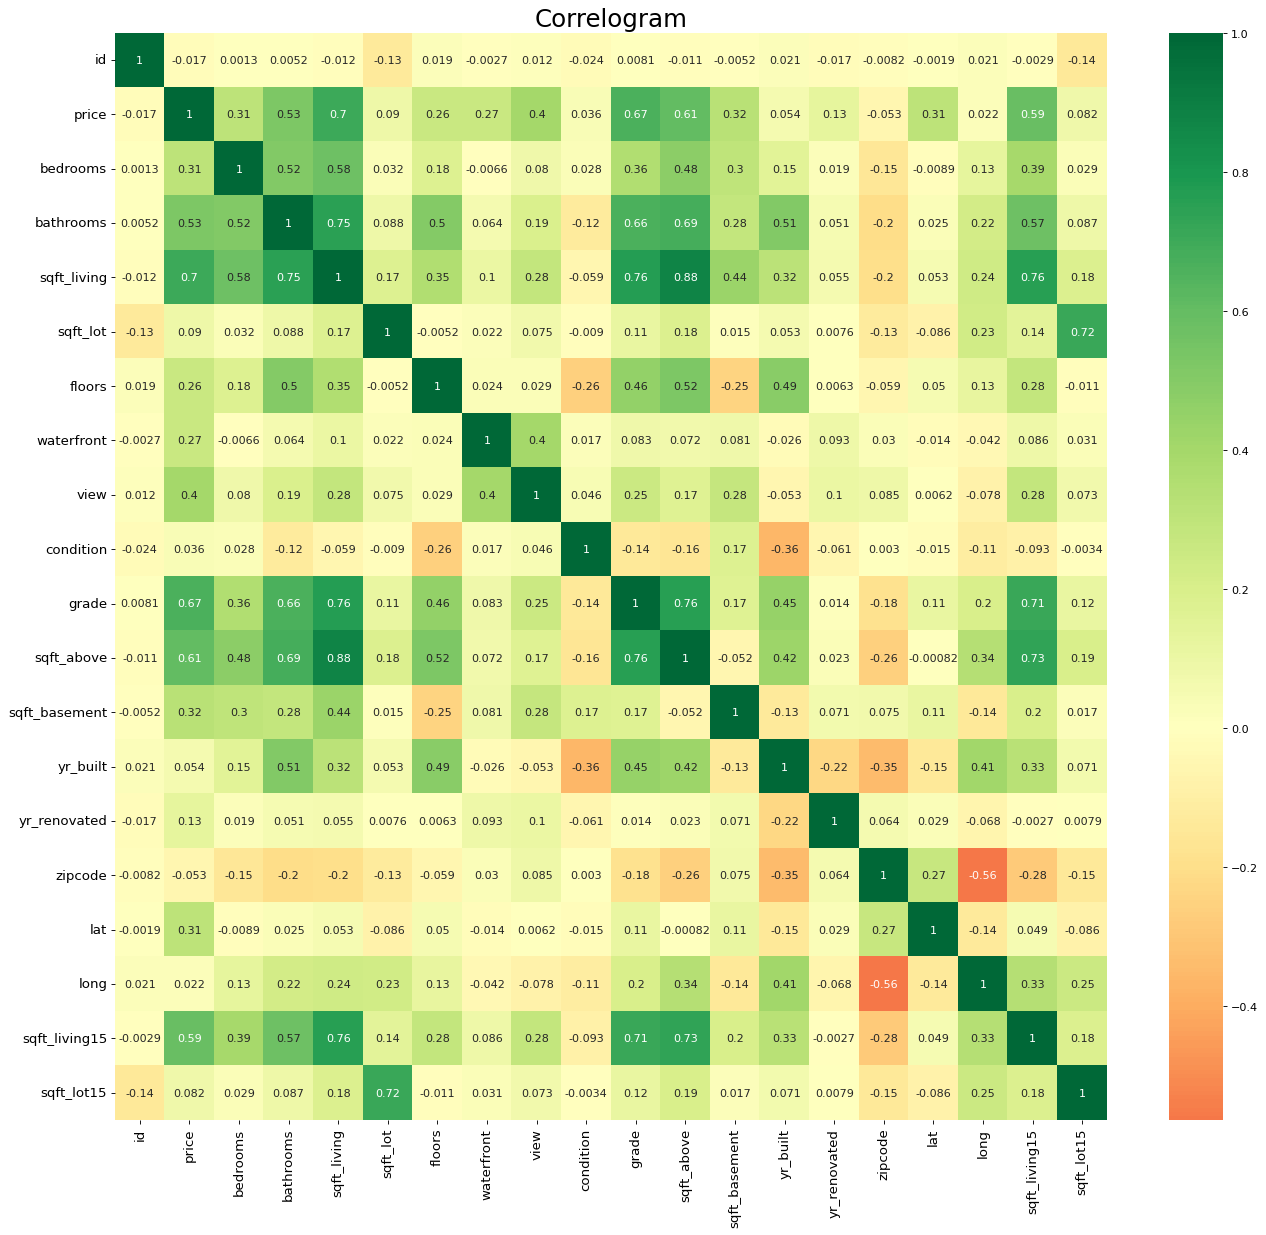

In [11]:
plt.figure(figsize=(20,18), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Создадим модель линейной регрессии

In [13]:
from sklearn.model_selection import train_test_split

In [29]:
y = df['price']
X = df.drop(columns = ['id', 'date', 'price'])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
w0 = model.intercept_
w0

11132079.055296328

In [33]:
w1 = model.coef_
w1

array([-3.75852839e+04,  4.19324048e+04,  1.16985956e+02,  1.03607539e-01,
        7.41264607e+03,  5.99941772e+05,  5.32633740e+04,  2.37846935e+04,
        9.52132921e+04,  7.26913832e+01,  4.42945721e+01, -2.66321019e+03,
        2.10824664e+01, -6.26107459e+02,  6.08371082e+05, -2.12050480e+05,
        1.53933358e+01, -4.00849097e-01])

In [36]:
eq = "Y = " + str(w0)
for i in range(X.shape[1]):
  eq += " + " + str(w1[i]) + "*X" + str(i)
print("Уравнение линейной регрессии: ", eq)

Уравнение линейной регрессии:  Y = 11132079.055296328 + -37585.28391085785*X0 + 41932.40479174113*X1 + 116.98595559021922*X2 + 0.10360753942742712*X3 + 7412.646073150293*X4 + 599941.7722882346*X5 + 53263.3740205733*X6 + 23784.693487628898*X7 + 95213.292076588*X8 + 72.69138318538468*X9 + 44.29457214891757*X10 + -2663.2101944638725*X11 + 21.082466354680324*X12 + -626.1074589572789*X13 + 608371.0818733701*X14 + -212050.4801662536*X15 + 15.39333580123018*X16 + -0.4008490970263665*X17


In [56]:
y_pred = pd.Series(model.predict(X_test))

In [80]:
X0 = X_test.reset_index()['sqft_living']

In [66]:
y_test = y_test.reset_index()['price']

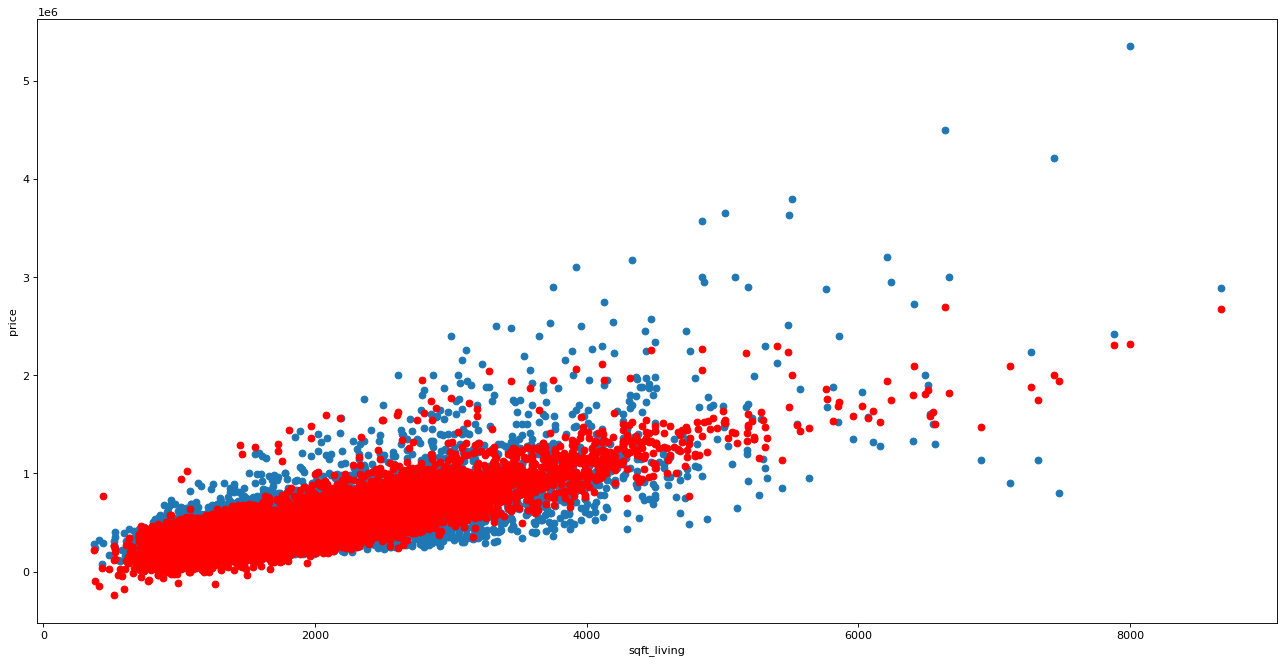

In [91]:
plt.figure(figsize=(20,10), dpi= 80)
plt.scatter(X0, y_test)
plt.scatter(X0, y_pred, color = 'red')
#plt.plot([X0[X0.argmin()], X0[X0.argmax()]], [y_pred[X0.argmin()], y_pred[X0.argmax()]], color='red', linewidth=2)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()

In [76]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 126998.3655646668
Mean Squared Error: 38312215058.67094
R2 score: 0.693780782514934


Коэффициент детерминации равен примерно 0,69; это можно считать довольно хорошим показателем, линейная регрессия достаточно точная